In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad_data = pd.read_csv('~/Desktop/advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

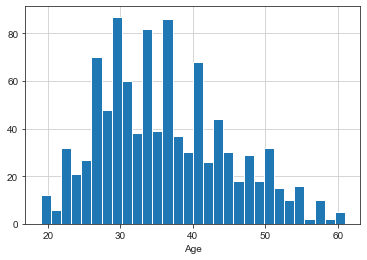

In [9]:
sns.set_style('ticks')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

In [10]:
pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)

Clicked on Ad,0,1
Country,,
Slovakia (Slovak Republic),2,0
Lesotho,1,0
Malaysia,3,0
Mozambique,1,0
Nepal,3,0
Nicaragua,3,0
Niue,3,0
Reunion,2,0
Panama,2,0


In [11]:
ad_data[ad_data['Clicked on Ad']==1]['Country'].value_counts().head(10)

Australia        7
Ethiopia         7
Turkey           7
South Africa     6
Liechtenstein    6
Liberia          6
Hungary          5
Peru             5
Mayotte          5
France           5
Name: Country, dtype: int64

In [12]:
ad_data['Country'].value_counts().head(10)

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Senegal           8
Liberia           8
Australia         8
South Africa      8
Micronesia        8
Name: Country, dtype: int64

In [13]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [14]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
type(ad_data['Timestamp'][1])

str

In [16]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [17]:
ad_data['Month'] = ad_data['Timestamp'].dt.month 

In [18]:
ad_data['Day'] = ad_data['Timestamp'].dt.day  

In [19]:
ad_data['Hour'] = ad_data['Timestamp'].dt.hour   

In [20]:
ad_data["Weekday"] = ad_data['Timestamp'].dt.dayofweek 

In [21]:
ad_data = ad_data.drop(['Timestamp'], axis=1) 

In [22]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

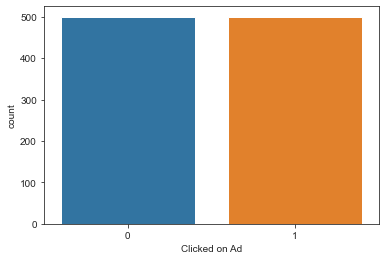

In [23]:
sns.countplot(x = 'Clicked on Ad', data = ad_data)

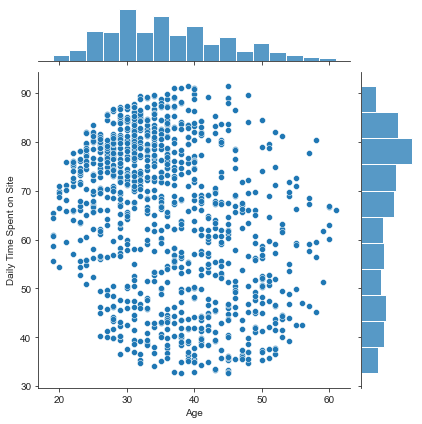

In [24]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = ad_data) 

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

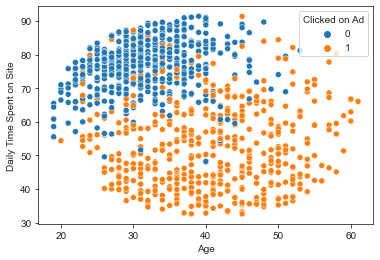

In [25]:
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

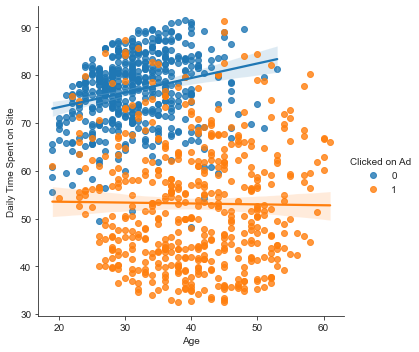

In [26]:
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

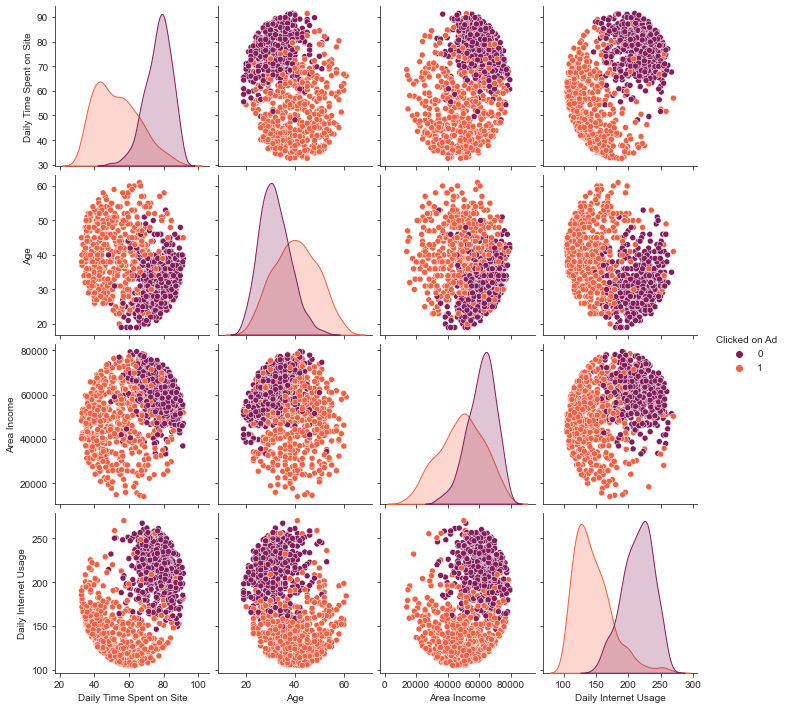

In [27]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


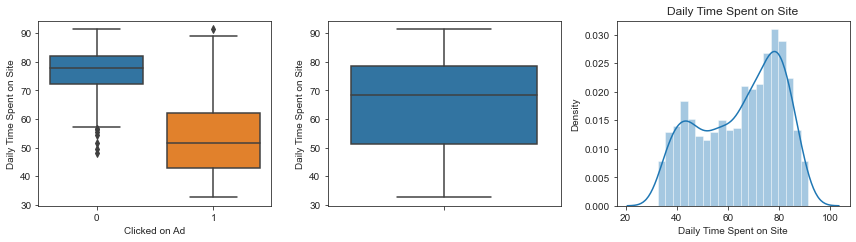

/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


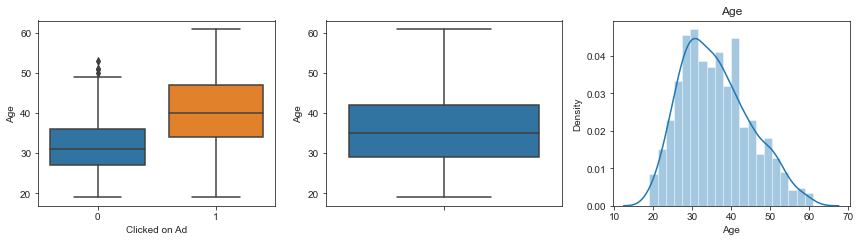

/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


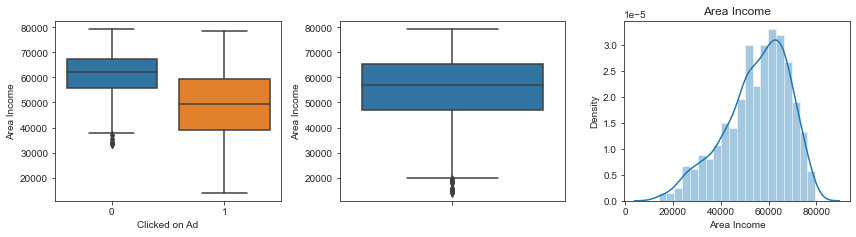

/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


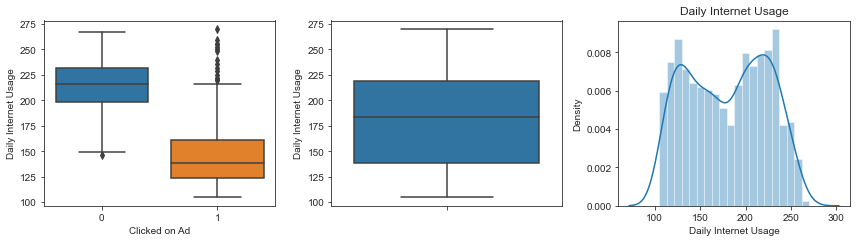

In [28]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= ad_data, y=ad_data[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= ad_data, y=ad_data[i])
    plt.subplot(2,3,3)
    sns.distplot(ad_data[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

In [29]:
print('oldest person didn\'t clicked on the ad was of was of:', ad_data['Age'].max(), 'Years')
print('oldest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].max(), 'Years')

oldest person didn't clicked on the ad was of was of: 61 Years
oldest person who clicked on the ad was of: 53 Years


In [30]:
print('Youngest person was of:', ad_data['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].min(), 'Years')

Youngest person was of: 19 Years
Youngest person who clicked on the ad was of: 19 Years


In [31]:
print('Average age was of:', ad_data['Age'].mean(), 'Years')

Average age was of: 36.009 Years


<AxesSubplot:>

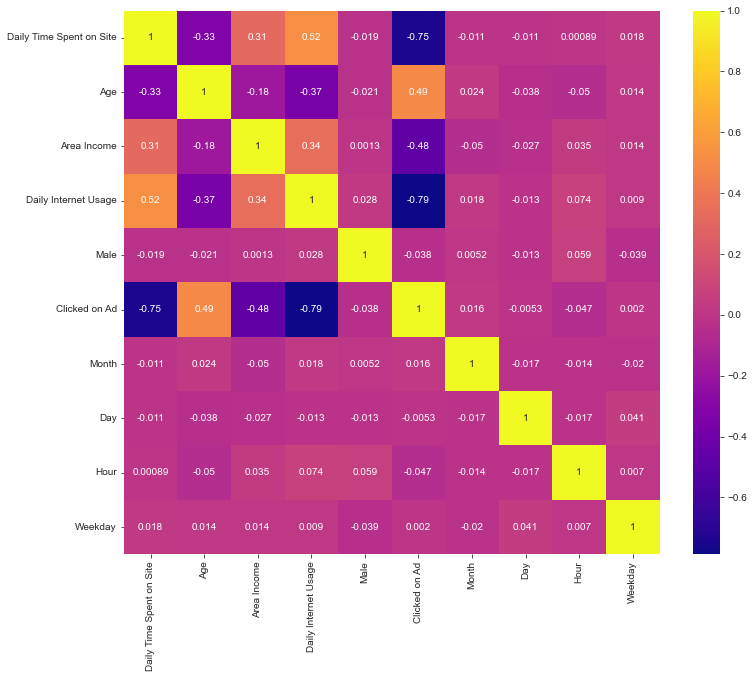

In [33]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(ad_data.corr(), cmap='plasma', annot = True) 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       171
           1       0.98      0.94      0.96       159

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [47]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[168   3]
 [ 10 149]]
